In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here, but you will need to set
# dark_mode = False

dark_mode = False

# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [133]:
altitude = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000]
density = [1.225, 1.112, 1.007, 0.9093, 0.8194, 0.7364, 0.6601, 0.5900, 0.5258, 0.4671, 0.4135, 0.1948, 0.08891, 0.04008, 0.01841, 0.003996, 0.001027, 0.0003097, 0.00008283, 0.00001846]

eyi = np.array(density)*.02

Text(0.5, 1.0, 'Altitude vs. Density of Air')

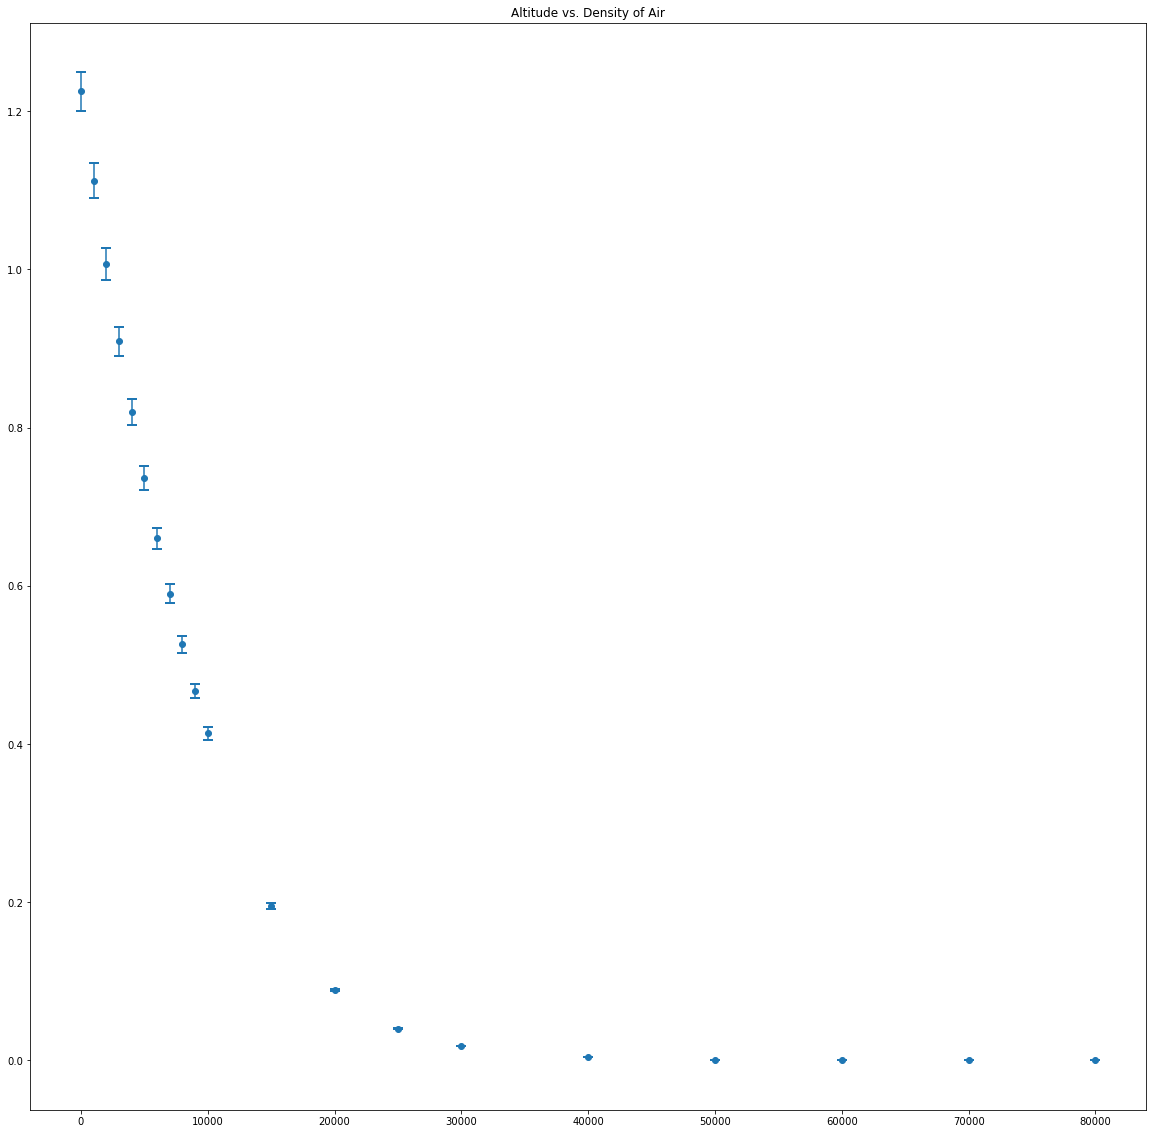

In [134]:
# Let's plot this data, just to see what it looks like

plt.rcParams["figure.figsize"] = (20,20)

figure, axis = plt.subplots(1, 1)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

# Plot the data in the upper left panel, and give this panel a title
plot1.errorbar(altitude,density,yerr=eyi, fmt='o', capsize=5, capthick=2)
plot1.set_title("Altitude vs. Density of Air")

In [135]:
# First, define a "fitting function", in this case the known formula for charging a capacitor

def density_fit_function(x,*par):
    return par[0]*np.exp(par[1]*x+par[2]*np.sqrt(x))
# Let's use the curve_fit package from scipy!

from scipy.optimize import curve_fit

# now, for this non-linear fit, we MUST provide some initial values for the parameters!!!!!
#
# compared to the linear fit example, we need to add a couple of parameters to the call
# to curve fit:
#
# sigma=eyi  ... this tells curve_fit to take into account errors in the y-values
# absolute_sigma = True ... this tells curve_fit to consider the actual error values, rather
#                           than just the relative difference between error values.

init_vals = [1.3, np.log(0.4)/10000, np.log(0.4)/100]
popt, pcov = curve_fit(density_fit_function,altitude,density,p0=init_vals,sigma=eyi,absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print ("Covariance Matrix:")
print(pcov)
print()
print ("Best Fit Parameters:")
print(popt)
print()
print ("Errors in Fit Parameters:")
print(perr)

Covariance Matrix:
[[ 3.03663717e-04  1.00164513e-08 -3.33951438e-06]
 [ 1.00164513e-08  5.72654027e-13 -1.59979103e-10]
 [-3.33951438e-06 -1.59979103e-10  4.78900989e-08]]

Best Fit Parameters:
[ 1.34823677e+00 -1.45359756e-04  1.09101061e-03]

Errors in Fit Parameters:
[1.74259495e-02 7.56739075e-07 2.18838065e-04]


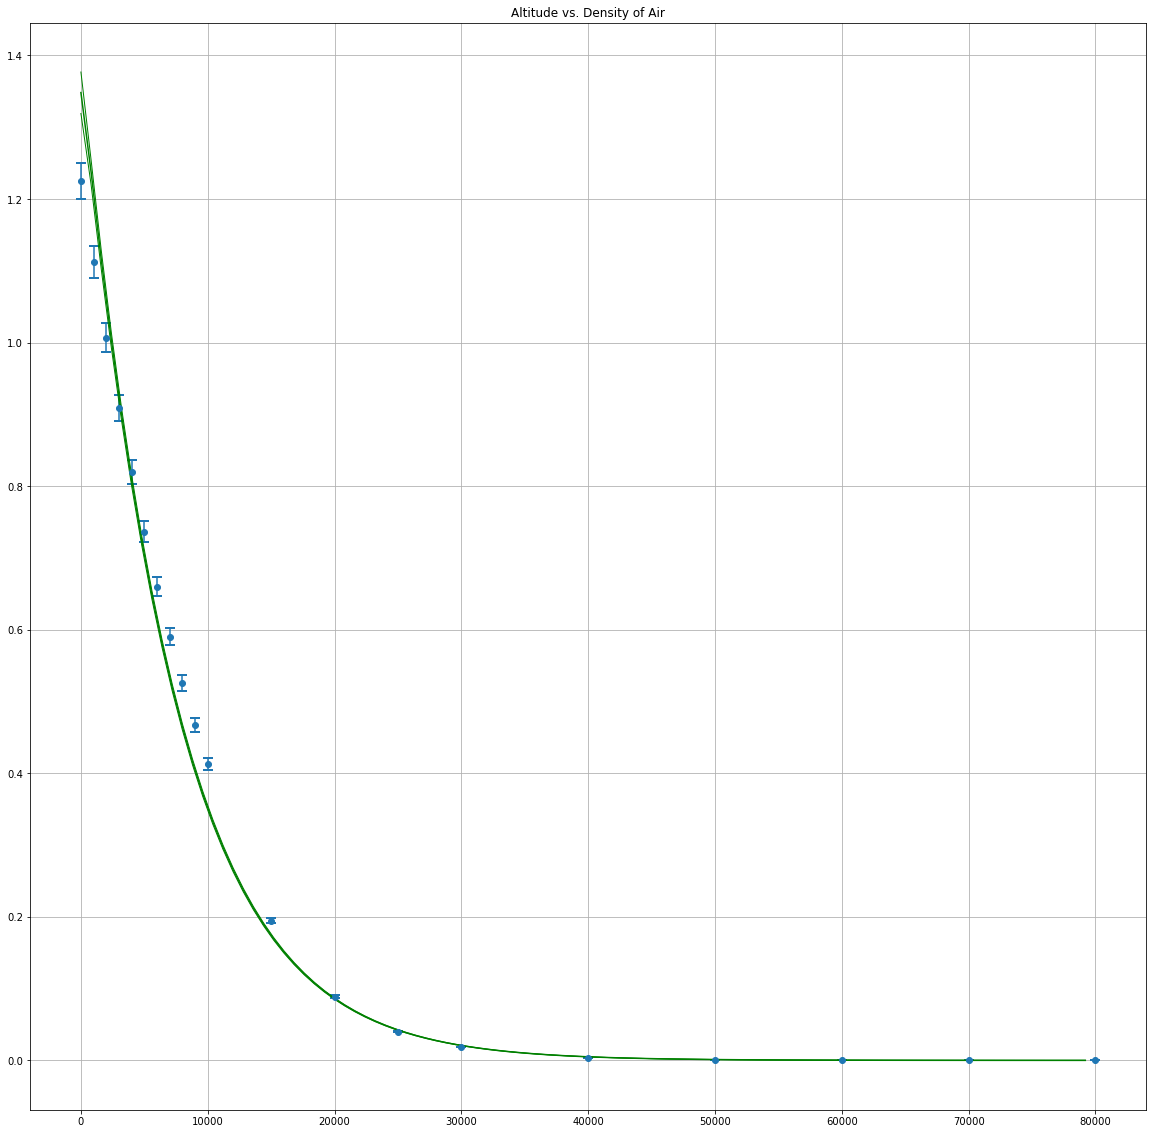

In [136]:
#Now, let's do some plotting magic!

# define a finely spaced array of x points, and then evaluate the y-values at
# each of these points, using the linear fit function with the best fit parameters from
# curve_fit

nfitpoints = 100
dx = (altitude[19]-altitude[0])/nfitpoints

xfitting = []
yfitting = []
for i in range(0,nfitpoints):
    xfitting.append(altitude[0]+dx*i)
    yfitting.append(density_fit_function(xfitting[i],*popt))
xfitting = np.array(xfitting)
yfitting = np.array(yfitting)
    
plot1.plot(xfitting,yfitting,'g-')

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([density_fit_function(xfitting,*pi) for pi in ps])

lower = np.percentile(ysample,5.0,axis=0)
upper = np.percentile(ysample,95.0,axis=0)
middle = (lower+upper)/2.0

plot1.plot(xfitting,lower,'g-',linewidth=1)
plot1.plot(xfitting,upper,'g-',linewidth=1)

plot1.grid()

figure